<a href="https://colab.research.google.com/github/BurnTheBunsen/pytorch-deep-learning-test/blob/main/Pytorch_Workflow_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {1: "data (preparing and loading)",
                      2: "build a model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
                      }
what_were_covering

{1: 'data (preparing and loading)',
 2: 'build a model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.8.0+cu126'

##1. Data preparing and loading
A. Get data into a numerical representation

B. Build a model to learn patterns in that numerical representation

In [3]:
# Create a known parameter
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
# Why is X capital here? because it is typically a matrix or a tensor
X =  torch.arange(start, end, step).unsqueeze(dim=1) # This is our input
y = weight * X + bias # This is our ideal output
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

# Splitting data into training and test sets (one of the most impotant conceptst in ML in general)
So we have 3 sets of data:
1. Training set 60~80%
2. Validation set (You dont always use this one) 10~20%
3. Test set 10~20%

In [4]:
#Create a train/test split
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# How can we better visualize our data?

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot training data in blue
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

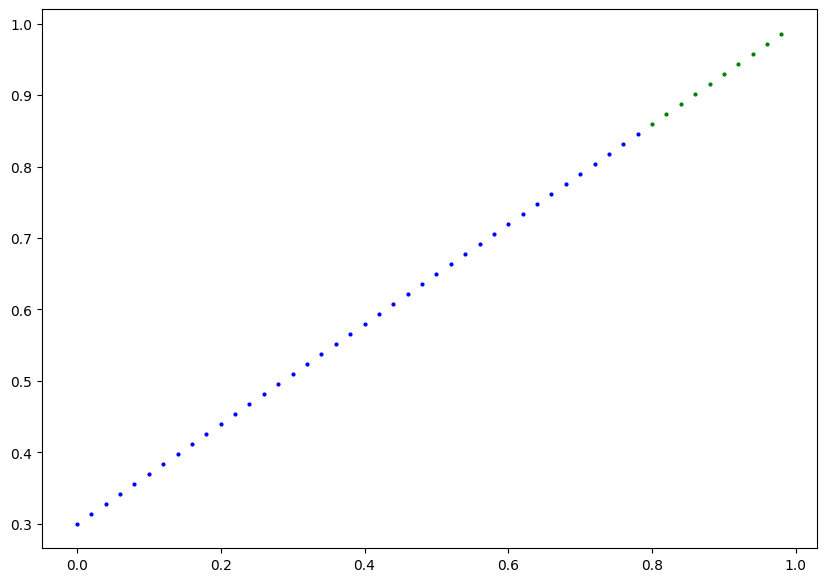

In [7]:
plot_predictions()

## 2. Build model

Our first PyTorch model


In [8]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    #"requires_grad=True" just tells pytorch that this parameter
    #is supposed to be updated via
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # We pass little x because quite often little x is passed and not the capital one
    return self.weights * x + self.bias #This is the linear regression formula


### PyTorch model building essentials

* torch.nn -> Contains all of the buildings for computational graphs
* torch.nn.Parameter -> What params should our model try and Learn
* torch.nn.Module -> The base class for all NN modules, if you subclass it you should overwrite forward()
* torch.optim -> This is where the optimizers live and they will help with Gradian Descent
* def forward() -> All nn.Module subclasses require you to overwrite forward()

### PyTorch Workflow
1. Get data ready
 * torchvision.tranforms
 * torch.utils.data.Dataset
 * torch.utils.data.DataLoader
2. Build or pick a model
  * torch.nn
  * torch.nn.Module
  * torchvision.models
3. Fit the model to the data and make a prediction

4. Evaluate the model
  * torchmetrics
5. Improve through experimentation
  * torch.utils.tensorboard
6. Save and reload your trained model


### Checking the contents of out PyTorch model

Now we've created a model, lets see whats inside.

So we can check our model parameters or whats inside using `.parameters()`

In [9]:
# Create a random seed
torch.manual_seed(42)

# Create a model instance
model_0 = LinearRegressionModel()

# Check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode`

To check our model's predctive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the forward method.

In [11]:
# Make predictions with model
# So with the word "With" here it makes things faster and makes sure
# that we dont accidentaly modify our model and hange its gradients.
with torch.inference_mode(): # Inference here turns off the gradient tracking
  y_preds = model_0(X_test)

# We could use the `torch.no_grad():` here as well but it doesnt
# save up on memory and its partially inferior.

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

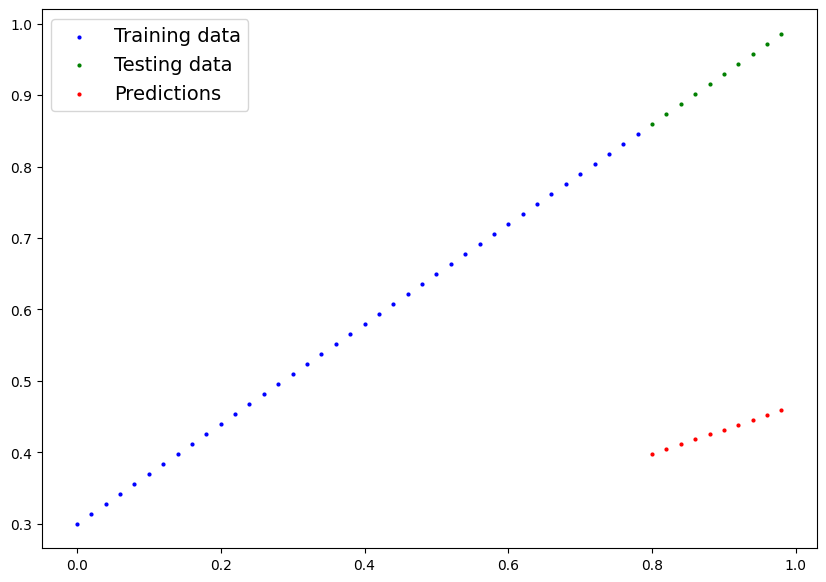

In [12]:
plot_predictions(predictions=y_preds)

## 3. Train your model

The whole idea of training a model is for a model to move from some
unknown params (could be random) to some *known* param.

or in other words from a poor representation of the data to a better representation
of our data

One way to measure how poor or how wrong our model's predictions are to use a loss function.

We have a fair few Loss Function built in. (Keep in mind that they can be reffered to as Cost function or criterion.

Things we need to train:

* **Loss function:** A function to measure how wrong our output is compared to our actual expected output. Lower is obv better.
* **Optimizer: ** Takes into account the loss of a model and adjusts the model's params.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# But if we want to get this list as labeled and more defined
# We can use this command
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a Loss Function
loss_fn = nn.L1Loss() # MAE Loss

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = Learning rate = possibly the most important hyperparameteryo u can set
# if lr = 0.001 its the decimal that it will adjust in each hit
# for example if our first component in our tensor is 0.3871 it will start changing
#from 0.007 of 0.3871

### How do we decide which loss function and optimizer should we use in our project and for our model?

This is completely probem-specific. But further down the line we will get a sense of what works for our model and what doesnt.

For example, for a regression problem like we have here, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, we'll likely use a loss function of `nn.BCELoss` (Binary cross entropy loss)

Really useful resource for this part:
https://www.cmarix.com/qanda/choosing-the-right-loss-function-for-ai-model-training/?utm_source=chatgpt.com

### Now we are going to make a training loop and a testing loop that we can use to train our model

0. Loop through the data
1. Forward pass (this involbed data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backward through our Network to calculate the gradients of each of the parameters of our model with respect to the loss (**BackPropagation**)
5. Optimizer step - use the optimizer to adjust our model's params to try and improve the loss (**Gradient Descent**)

In [16]:
# Epoch is the number of our loops (It is a hyperparam because we set it ourselves)
epochs = 200

# Track different values
epoch_count= []
loss_values= []
test_loss_values= []


# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # trainmode in pytorch sets all params that require grads to True

  # 1. Forward pass
  y_pred = model_0(X_train)
  # 2. Calculate the Loss
  loss = loss_fn(y_pred, y_train)
  # 3. Optimizer zero grad
  optimizer.zero_grad() # We have to zero it out
  # 4. Perform backprop on the loss with respect to the params of the model
  loss.backward()
  # 5. Step the optimizer (perform Gradient descent)
  optimizer.step() # by default how the optimizer changes will accumulate through the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not neede for evaluation/testing (dropout and batchnorm)
  with torch.inference_mode(): # turns off gradiet tracking and a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what is actually happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # print out the model state_dict()
    print(model_0.state_dict())



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

In [17]:
import numpy as np

loss_values_numpy = np.array(torch.tensor(loss_values).numpy())
test_loss_values_numpy = np.array(torch.tensor(test_loss_values).numpy())

/tmp/ipython-input-3402380178.py:3: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  loss_values_numpy = np.array(torch.tensor(loss_values).numpy())


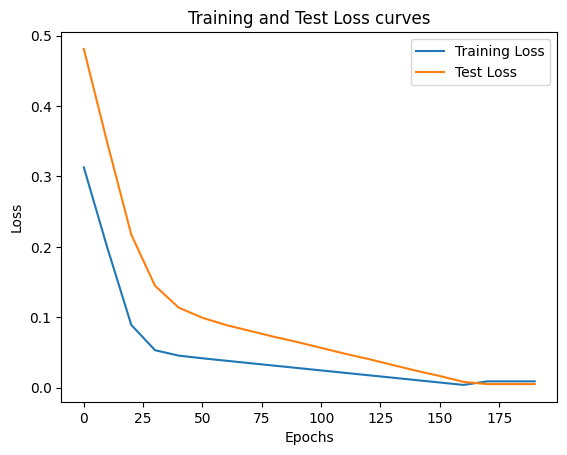

In [18]:
# Plot the loss curves

plt.plot(epoch_count, loss_values_numpy, label="Training Loss")
plt.plot(epoch_count, test_loss_values_numpy, label="Test Loss")
plt.title("Training and Test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new;

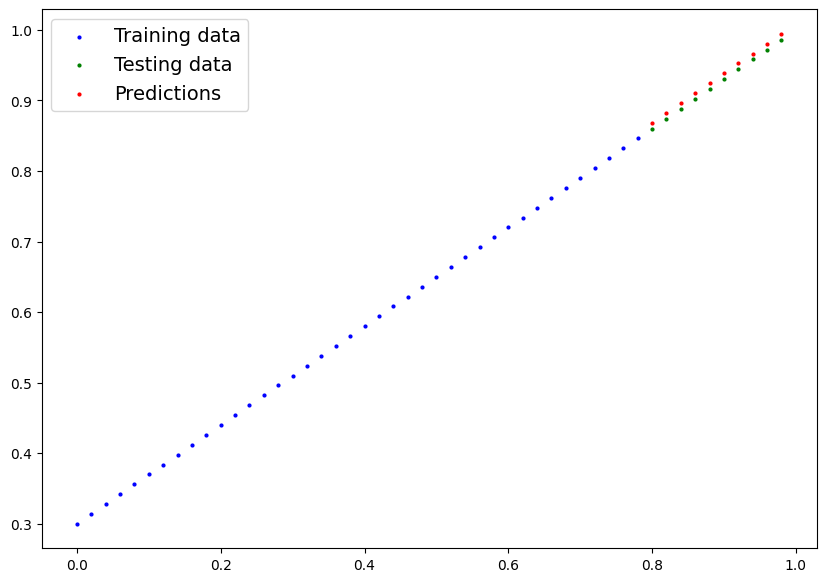

In [20]:
plot_predictions(predictions=test_pred);

## Saving a model in pytorch

There are three main methods of saving and loading models in PyTorch

1. `torch.save()` - Allows us to save a PyTorch object in Python's pickle format
2. `torch.load()` - Allows us to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - This allows us to load a model's saved state dictionary

Extra resource: https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-a-general-checkpoint-for-inference-and-or-resuming-training

We will later work on how to save and load a general checkpoint for our model.

In [21]:
# Saving our pytorch model
from pathlib import Path

# 1. Create a model directory
MODEL_PATH = Path ("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "Workflow_test_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)
# 3. Save the model state dict


Saving model to: models/Workflow_test_0.pth


## Loading a PyTorch model

Since we saved our model"s `state_dict()` rather tan the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [22]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated params)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
# Make some predictions just make sure that our model is working properly
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [26]:
# Comper loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together
Lets go back through the steps abovr and see it all in one place

In [27]:
# Import Pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [28]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using Device: {device}')

Using Device: cuda


###6.1 Data

In [29]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

#Create X and y (features and label)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [30]:
# Split the data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y_train[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

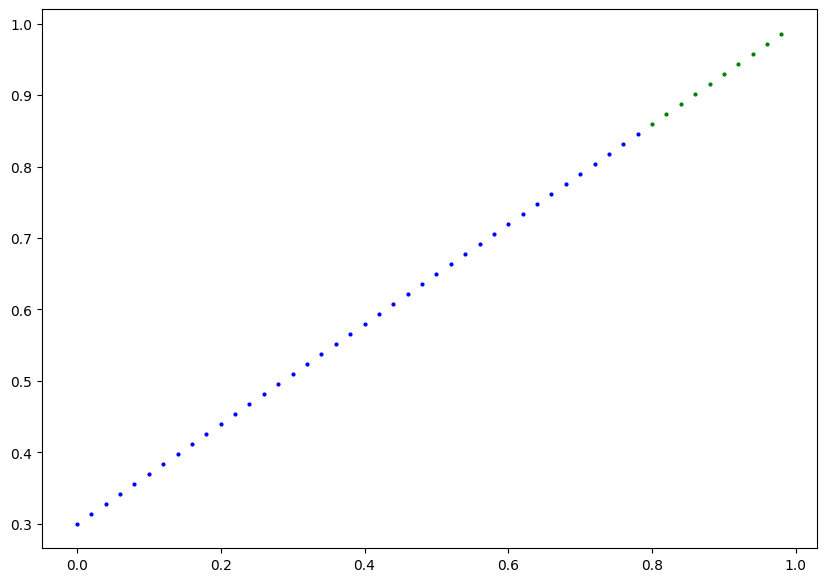

In [31]:
# Now we are going to plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear model

In [32]:
# Create a Linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model's params / also called: Linear transform, probing layer, fully conected layer, DENSE layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1) # Each input of X equates to one output of y

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [33]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [34]:
# Set the model to use our target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

## 6.3 Training

For training we need:

* Loss function
* Optimizer
* Training loop
* Testing loop

In [35]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [36]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data) )
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      print(model_1.state_dict())

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
OrderedDict({'linear_layer.weight': tensor([[0.7606]], device='cuda:0'), 'linear_layer.bias': tensor([0.8200], device='cuda:0')})
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
OrderedDict({'linear_layer.weight': tensor([[0.7216]], device='cuda:0'), 'linear_layer.bias': tensor([0.7200], device='cuda:0')})
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
OrderedDict({'linear_layer.weight': tensor([[0.6826]], device='cuda:0'), 'linear_layer.bias': tensor([0.6200], device='cuda:0')})
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
OrderedDict({'linear_layer.weight': tensor([[0.6436]], device='cuda:0'), 'linear_layer.bias': tensor([0.5200], device='cuda:0')})
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
OrderedDict({'linear_layer.weight': tensor([[0.6046]], device='cuda:0'), 'linear_layer.bias': tensor([0.4200], device='cuda:0')})
Ep

In [39]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

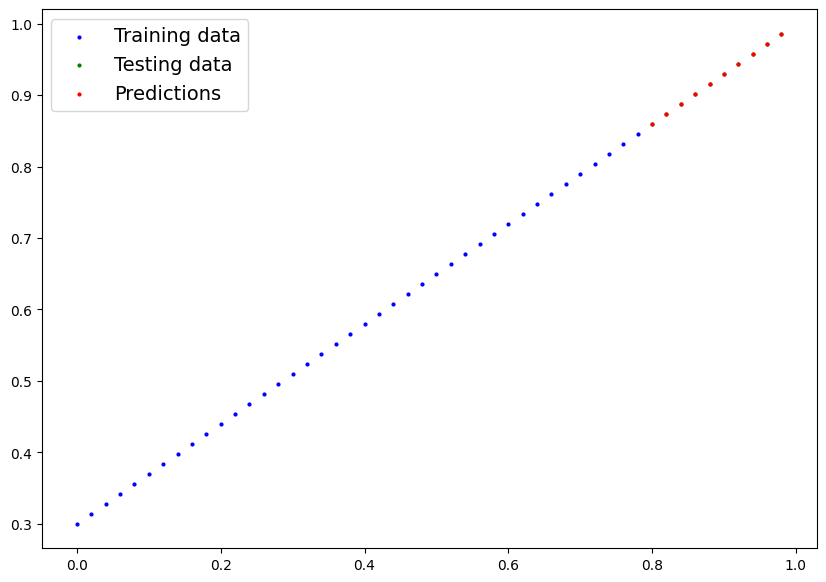

In [42]:
plot_predictions(predictions=y_preds.cpu())

## 6.4 Saving and loading a trained model

In [48]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "PyTorch_Workflow_Model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)
print(f'Saving model to: {MODEL_SAVE_PATH}')


Saving model to: models/PyTorch_Workflow_Model_1.pth


In [58]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [59]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [61]:
# Evaluate loaded model 1
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')